In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [7]:
with open("../data/interim/02_customer_data_preprocessed.pkl", "rb") as file:
    df = pickle.load(file)

df.head()

,CustomerID,Days_Since_Last_Purchase,Total_Purchases,Total_Spent,Average_Value/Purchase,Total_Products_Bought,Cancellation_Frequency,Trend,Average_Monthly_Spending,Is_Outlier
0,12346.0,325,2,0.00,0.00,0,1.0,0.000000,0.000000,False
1,12347.0,2,7,4310.00,615.71,2458,0.0,4.486071,615.714286,False
2,12348.0,75,4,1437.24,359.31,2332,0.0,-100.884000,359.310000,False
3,12349.0,18,1,1457.55,1457.55,630,0.0,0.000000,1457.550000,False
4,12350.0,310,1,294.40,294.40,196,0.0,0.000000,294.400000,False


In [14]:
def plot_multiple_boxplots(dataframe, column_names):
    # Check if any of the specified columns are not found in the DataFrame
    for column_name in column_names:
        if column_name not in dataframe.columns:
            print(f"Column '{column_name}' not found in the DataFrame.")
            return

    num_plots = len(column_names)
    num_rows = num_plots // 2 + num_plots % 2
    num_cols = 2

    plt.figure(figsize=(12, 8))
    for i, column_name in enumerate(column_names):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(data=dataframe, y=column_name)
        plt.title(f'Box Plot of {column_name}')
        plt.ylabel(column_name)

    plt.tight_layout()
    plt.show()

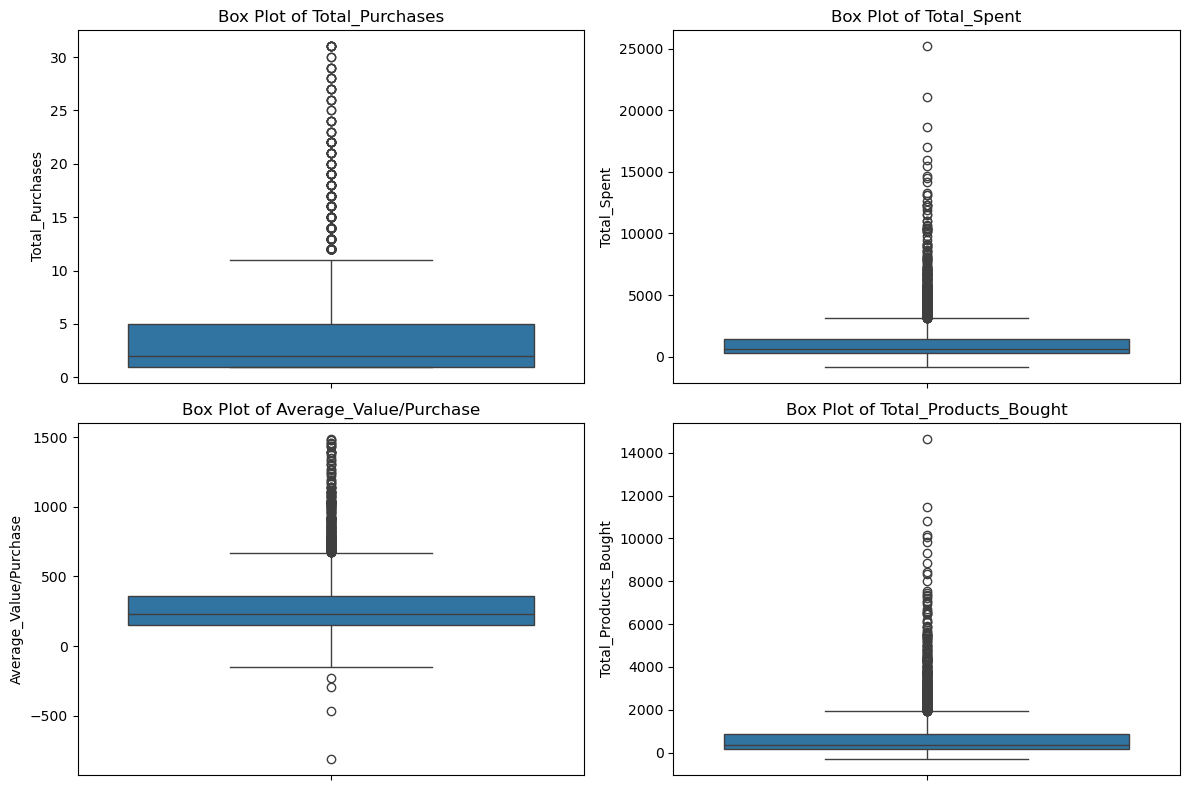

In [15]:
columns_to_plot = ['Total_Purchases', 'Total_Spent', 'Average_Value/Purchase', 'Total_Products_Bought']
plot_multiple_boxplots(df, columns_to_plot)

In [16]:
def plot_correlation_matrix(dataframe):
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Set the size of the heatmap
    plt.figure(figsize=(10, 8))

    # Create a heatmap using seaborn
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

    # Set the title
    plt.title('Correlation Matrix')

    # Display the plot
    plt.show()

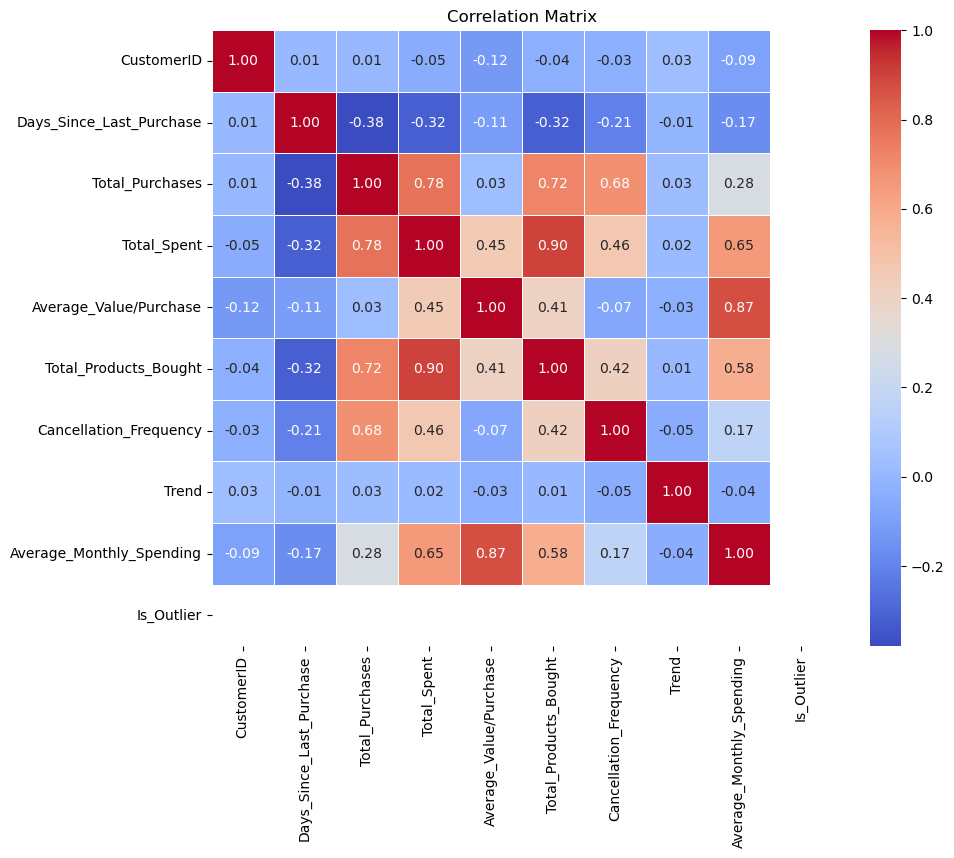

In [17]:
 plot_correlation_matrix(df)

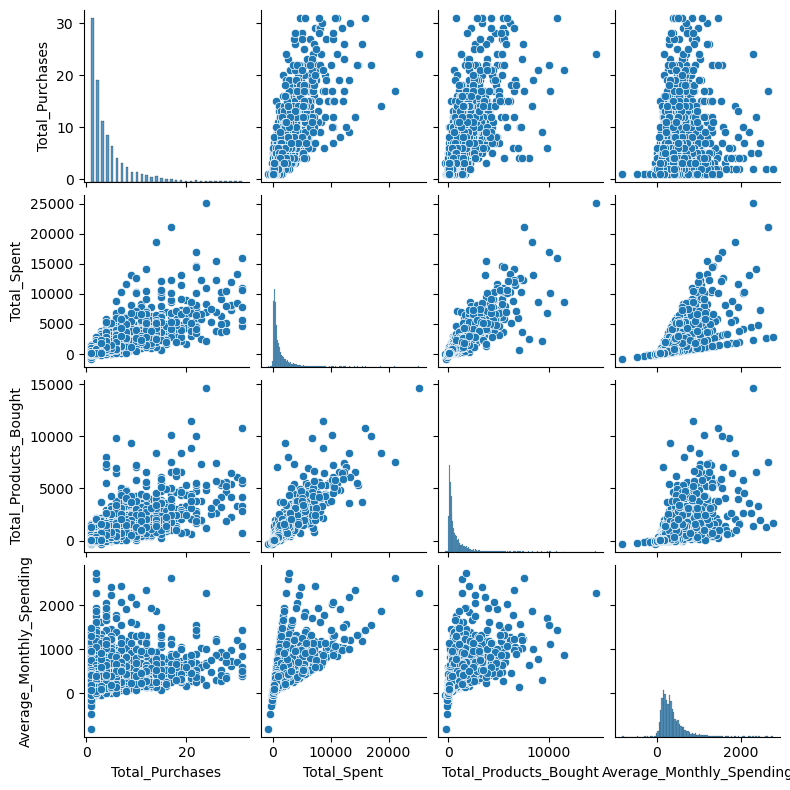

In [18]:
def plot_pairplot(dataframe, numerical_columns):
    # Create a subset of the DataFrame with the specified numerical columns
    df_subset = dataframe[numerical_columns]

    # Create and display the pairplot
    sns.pairplot(df_subset, height=2)
    plt.show()


numerical_columns = ['Total_Purchases', 'Total_Spent', 'Total_Products_Bought', 'Average_Monthly_Spending']
plot_pairplot(df, numerical_columns)
